# importing important librarys 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Dense,LSTM,Bidirectional,Embedding,Dropout
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
import re
from sklearn.ensemble import RandomForestClassifier

In [2]:
path = "C:\\Users\\Moti\Desktop\\Intent\\Meliha Research\\maliha_dataset_researchs.xlsx"
data=pd.read_excel(path, names=['Text','Intent'])
data.sample(frac=1).reset_index(drop=True)
print(data.shape)
data.head()

(10561, 2)


,Text,Intent
0,Kiyyoo dirama oso eguti jirun na darbe tari a...,Question
1,Meeti ree kuta 28ffaa,Question
2,Kutaa digdami sadetaffa isiin egee dadhabee.,Negative
3,Kutaa digdami sadetaffaa fiidagaa maali nuuraa...,Negative
4,Nuuf jabbadhakaa warii Akka kotti kiyyoo jaala...,Positive


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


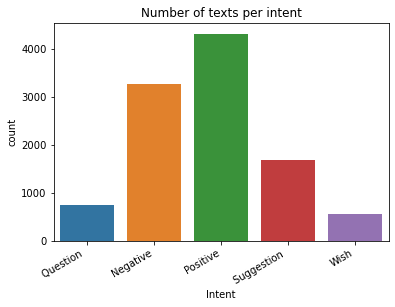

In [3]:
#sns.countplot(x='Intent', data=data)
chart = sns.countplot(data.Intent)
plt.title("Number of texts per intent")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

In [4]:
data["Intent"].value_counts()
#print(len('Gosa_miira'))
#print(len('jechoota'))

Positive       4320
Negative       3271
Suggestion     1686
Question        736
Wish            546
Name: Intent, dtype: int64

# data preprocessing  

In [5]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    sentence = sen.lower()
    sentence = re.sub(r'wo*w','wow', sentence)
    sentence = re.sub(r'uu*f','uff', sentence)
    return sentence
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(Text):
    return TAG_RE.sub('', Text)

In [6]:
def remove_stopwords(review_words):
    with open('stopwords.txt')as stopfile:
        stopwords=stopfile.read()
        list=stopwords.split()
        print(list)
        with open("intent1.csv") as workfile:
            read_data=workfile.read()
            data=read_data.split()
            print(data)
            for word1 in list:
                for word2 in data:
                    if word1==word2:
                        return data.remove(list)
                        print(remove_stopwords)

In [7]:
data['Text'].apply(lambda x: x.lower())

0        kiyyoo dirama oso  eguti jirun na darbe tari a...
1                                    meeti ree kuta 28ffaa
2             kutaa digdami sadetaffa isiin egee dadhabee.
3        kutaa digdami sadetaffaa fiidagaa maali nuuraa...
4        nuuf jabbadhakaa warii akka kotti kiyyoo jaala...
                               ...                        
10556    isheenis namoota dogoggoraa waliin lafa dogogg...
10557    vidiyichis battalumatti qoodamuun marsariitiiw...
10558    gochiwwan qaamaa warraabbicha irratti ture bah...
10559              jechi gurbbichaa altokkicha dhagahame. 
10560                           viidiyoo waraabaa jirtaa? 
Name: Text, Length: 10561, dtype: object

In [8]:
Number_of_words = data["Text"].apply(lambda n: len(n.split()))
print(data.head())

                                                Text     Intent
0  Kiyyoo dirama oso  eguti jirun na darbe tari a...  Question 
1                              Meeti ree kuta 28ffaa  Question 
2       Kutaa digdami sadetaffa isiin egee dadhabee.   Negative
3  Kutaa digdami sadetaffaa fiidagaa maali nuuraa...   Negative
4  Nuuf jabbadhakaa warii Akka kotti kiyyoo jaala...   Positive


In [9]:
print(sum(Number_of_words))
#print(total_words)

75837


# Feature Extraction

In [10]:
tokenizer=Tokenizer(num_words=4000,split=" ")
tokenizer.fit_on_texts(data['Text'].values)
x=tokenizer.texts_to_sequences(data['Text'].values)
x=pad_sequences(x)
x[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  200, 3024, 3025,   37,  192,  140,  325],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  438, 3332],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  162, 3333,  326,  422],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,  162, 3333,  157, 3115,   47],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   

In [11]:
model = Sequential()
model.add(Embedding(60000, 8, input_length=x.shape[1]))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(250, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
model.add(Bidirectional(LSTM(250, dropout=0.3, recurrent_dropout=0.2)))
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.3))
model.add(Dense(5, activation = 'softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [13]:
y=pd.get_dummies(data['Intent']).values
[print(data['Intent'][i],y[i]) for i in range(0,5)]

Question  [0 0 1 0 0]
Question  [0 0 1 0 0]
Negative [1 0 0 0 0]
Negative [1 0 0 0 0]
Positive [0 1 0 0 0]


[None, None, None, None, None]

# Training and Testing dataset Splitting 

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=0)

# Train the Model

In [15]:
batch_size = 64
epochs = 25
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(x_test, y_test), verbose=2)

Epoch 1/25
149/149 - 294s - loss: 1.3153 - accuracy: 0.4173 - val_loss: 1.0930 - val_accuracy: 0.4891 - 294s/epoch - 2s/step
Epoch 2/25
149/149 - 289s - loss: 0.9305 - accuracy: 0.6181 - val_loss: 0.7680 - val_accuracy: 0.7058 - 289s/epoch - 2s/step
Epoch 3/25
149/149 - 326s - loss: 0.7102 - accuracy: 0.7251 - val_loss: 0.6227 - val_accuracy: 0.7796 - 326s/epoch - 2s/step
Epoch 4/25
149/149 - 291s - loss: 0.5695 - accuracy: 0.7852 - val_loss: 0.5308 - val_accuracy: 0.8004 - 291s/epoch - 2s/step
Epoch 5/25
149/149 - 292s - loss: 0.4880 - accuracy: 0.8149 - val_loss: 0.4877 - val_accuracy: 0.8193 - 292s/epoch - 2s/step
Epoch 6/25
149/149 - 291s - loss: 0.4313 - accuracy: 0.8350 - val_loss: 0.4812 - val_accuracy: 0.8212 - 291s/epoch - 2s/step
Epoch 7/25
149/149 - 306s - loss: 0.4136 - accuracy: 0.8396 - val_loss: 0.4732 - val_accuracy: 0.8325 - 306s/epoch - 2s/step
Epoch 8/25
149/149 - 319s - loss: 0.3831 - accuracy: 0.8570 - val_loss: 0.4658 - val_accuracy: 0.8401 - 319s/epoch - 2s/step


# Test the Model 

In [16]:
predictions = model.predict(x_test)

34/34 [==============================] - 24s 484ms/step


In [17]:
scores = model.evaluate(x_test, y_test,verbose=2)

print(scores)

34/34 - 20s - loss: 0.4231 - accuracy: 0.8638 - 20s/epoch - 585ms/step
[0.42310547828674316, 0.8637653589248657]


In [35]:
model.save("Intent_Classification.h5")

In [19]:
new_intent = ['Kiyyoo dirama oso  eguti jirun na darbe tari ayaana moo sababa godhatu moyuu']
seq = tokenizer.texts_to_sequences(new_intent)
padded = pad_sequences(seq, maxlen=6000)
pred = model.predict(padded)
Intent = ['Question', 'Negative', 'Positive', 'Suggestion', 'Wish']
print(pred, Intent[np.argmax(pred)])

1/1 [==============================] - 26s 26s/step
[[2.8812443e-03 3.7719042e-04 9.9644345e-01 2.9311687e-04 4.9912192e-06]] Positive


In [20]:
[print (data['Text'][i], predictions[i], y_test[i]) for i in range(0, 400)]

Kiyyoo dirama oso  eguti jirun na darbe tari ayaana moo sababa godhatu moyuu [9.9495125e-01 4.9689948e-03 5.7766956e-05 2.1747021e-05 2.2536892e-07] [1 0 0 0 0]
Meeti ree kuta 28ffaa [0.15569408 0.11299005 0.28665614 0.40153942 0.04312034] [0 0 1 0 0]
Kutaa digdami sadetaffa isiin egee dadhabee. [3.7471273e-05 9.9656749e-01 1.0638368e-05 3.3735954e-03 1.0835989e-05] [0 1 0 0 0]
Kutaa digdami sadetaffaa fiidagaa maali nuuraa tuursiftaani bar ani 1faa haanga 27faa haarfoofan tuuree [0.35745662 0.50857973 0.04262635 0.0380943  0.05324299] [0 1 0 0 0]
Nuuf jabbadhakaa warii Akka kotti kiyyoo jaalatan  [9.9967957e-01 3.1058583e-04 4.8965239e-06 4.6522478e-06 3.5476424e-07] [1 0 0 0 0]
Bayyee namatti tola itti fufa gariidha  [2.5222455e-03 9.9429780e-01 1.1216566e-04 2.9829189e-03 8.4861014e-05] [0 1 0 0 0]
Diraamichi torbetti yeroo lamaa nuuf dhiyaachuu qaba [0.00422468 0.9601897  0.00494596 0.02940152 0.00123814] [0 1 0 0 0]
Ani dhugaa dubbachuuf baayyeen diraamaa kana jaalladhee ilaalaa j

Diraamaa midhagaa dha nuuf jabaadhaa [1.2501729e-02 1.5830273e-04 9.8703474e-01 2.9164518e-04 1.3512172e-05] [0 0 1 0 0]
Diraama kana  irraa wan bayyee irraa baradhe jabaadha  ittii fufaa [0.0090375  0.9778151  0.00437896 0.00751268 0.00125578] [0 1 0 0 0]
Diraamaa kiyooo anaa dhufuuu [0.00115326 0.68642545 0.00139993 0.30946916 0.00155212] [0 0 0 1 0]
Jabaadhaa [0.01122195 0.03911102 0.03939525 0.29048446 0.61978734] [0 0 0 1 0]
Torbee nuraa hin dabarsiinaa [8.7947544e-04 9.6768188e-01 3.9178148e-04 3.0445091e-02 6.0182769e-04] [0 1 0 0 0]
Maalif nuraa turtaan [1.0161691e-03 9.9206793e-01 1.8605460e-04 6.3548679e-03 3.7486033e-04] [0 1 0 0 0]
Ana dhufuu jaalatamtoota keenyaa  [9.9961674e-01 2.1712661e-04 7.1129114e-05 8.5453728e-05 9.5155992e-06] [1 0 0 0 0]
Kijibanii akka robsan kanaa hin jiruu [9.9998355e-01 1.3325422e-05 1.9592640e-06 1.2277422e-06 3.3348773e-08] [1 0 0 0 0]
Jabaadhaa [1.84340952e-05 9.99856353e-01 1.66716382e-06 1.20045705e-04
 3.43154761e-06] [0 1 0 0 0]
Baga nag

Fiilmii afaan oromoo keessaa Kan akkanaa daawwadhee hin beekuu  [7.0803631e-05 7.6034549e-04 6.3354213e-04 9.9843794e-01 9.7356104e-05] [0 0 0 1 0]
Baayee natti tole dhugaa kutaa dhufuratti meelu garraa gubbuu qabdaa sinaan [7.2413051e-05 9.0350539e-07 9.9990070e-01 2.0000032e-05 5.9260824e-06] [0 0 1 0 0]
Diraamaa bareedadha garuu hin xiqqaate [0.51485735 0.28284115 0.07343205 0.1156434  0.013226  ] [1 0 0 0 0]
Oromoon kiyaa bareduu dha [0.0026322  0.01038504 0.06768525 0.00262471 0.9166728 ] [0 0 0 0 1]
Ijoollee maati naa ta'aa  [2.3097577e-04 3.8629645e-03 4.5126423e-04 9.9534434e-01 1.1049760e-04] [0 0 0 1 0]
Heduu namattii toltanii. garuu yeroo nujalaa gabasitanii malee  [4.2102354e-05 2.3238440e-03 2.8633259e-04 8.4143551e-03 9.8893344e-01] [0 0 0 0 1]
Baga nagaan dhuftan  [9.9936432e-01 4.5450151e-04 7.6412216e-05 9.9899546e-05 4.8585871e-06] [1 0 0 0 0]
Jabaadha isin ija keenya nu barbaachiiftuu [3.5081473e-05 1.7171117e-02 1.3344354e-04 9.8262042e-01 3.9974922e-05] [0 0 0 1 0]

Baayee namatii tolaa [0.01617218 0.13698493 0.02654001 0.8137816  0.00652137] [0 1 0 0 0]
Akkatti nama Arsanii garu danda'u dhaa [9.9992156e-01 7.1230366e-05 5.1033380e-06 2.0335908e-06 5.4918630e-08] [1 0 0 0 0]
Diraamaan kiyyoo baayee  baredaa akumati itti haa fufu [9.9894518e-01 9.1624825e-04 6.7093511e-05 6.7980589e-05 3.6258541e-06] [1 0 0 0 0]
Ani dhuma diraamaa kana ilaluf jarjareraa  [1.6895863e-05 9.9991858e-01 1.3830045e-06 6.0414615e-05 2.7574295e-06] [0 1 0 0 0]
minxaafiin kun maali isheen addee meeluu [3.1025773e-03 9.9384695e-01 5.5767410e-04 2.2858900e-03 2.0684628e-04] [0 1 0 0 0]
Monetiin garaa na nyaatii  [4.6169571e-05 1.7476130e-03 7.4167689e-04 9.9737036e-01 9.4217903e-05] [0 0 0 1 0]
Maattii diraamaa kiyyoo baga nagaan dhuftan [7.9387746e-06 9.9975473e-01 1.1838754e-06 2.3308967e-04 2.9426935e-06] [0 1 0 0 0]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

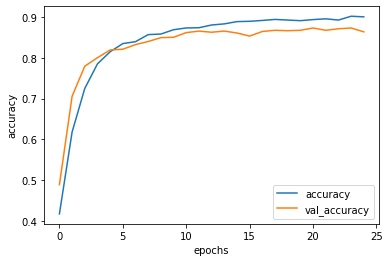

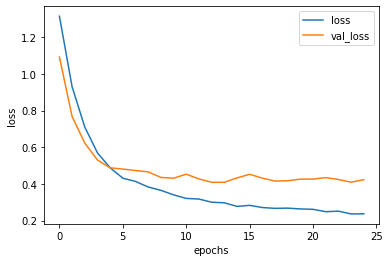

In [21]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [22]:
cm=metrics.confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))

In [23]:
class_names = data.Intent

In [24]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

In [25]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [26]:
print(FP)
print(FN)
print(TP)
print(TN)

[27. 55. 11. 38. 13.]
[35. 46. 16. 33. 14.]
[314. 383.  66. 114.  36.]
[681. 573. 964. 872. 994.]


In [27]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*precision*recall/(precision+recall)

In [28]:
print("precision",precision)
print("recall  ", recall)
print("f1_score",f1_score)

precision [0.92082111 0.87442922 0.85714286 0.75       0.73469388]
recall   [0.89971347 0.89277389 0.80487805 0.7755102  0.72      ]
f1_score [0.91014493 0.88350634 0.83018868 0.76254181 0.72727273]


In [29]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [30]:
accuracy(cm)

0.8637653736991485

In [31]:
intent_small = ["Positive", "Negative", "Suggestion", "Question", "Wish "]

In [32]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

34/34 [==============================] - 13s 366ms/step
Normalized confusion matrix


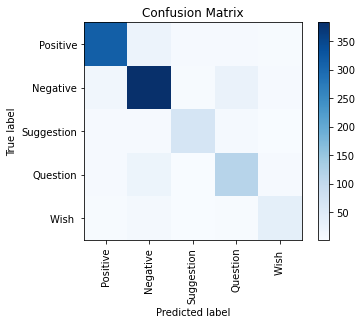

In [33]:
y_pred = model.predict(x_test).argmax(axis=-1)
matrix = metrics.confusion_matrix(y_test.argmax(axis=-1), y_pred)
plot_confusion_matrix(cm=matrix, normalize=True, classes=intent_small, title='Confusion Matrix')